# Kaggle Competition Final

In [977]:
# imports 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn import svm
from sklearn import metrics
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

## Loading in the Data

In [978]:
# read in the data from the csv file 
train = pd.read_csv('data/byu-data-science-capstone-classification/DSCapstoneKaggleTrain.csv', index_col=[0])
test = pd.read_csv('data/byu-data-science-capstone-classification/DSCapstoneKaggleTest.csv', index_col=[0])
# check the shape of the data
print(train.shape)
print(test.shape)

# check the first few rows of the data
train.head()

# check the data types of the columns
train.dtypes

# check for missing values
train.isnull().sum()

# check the distribution of the target variable
train['class'].value_counts()

train.head(30)


(8000, 12)
(2000, 11)


,0,1,2,3,4,5,6,7,8,9,class,id
0,3.179786,-1.323101,0.083145,0.609515,-0.613053,0.108101,-3.291309,-0.452742,-1.398187,1.550124,0,0
1,-3.561601,-2.556290,-0.179052,0.480700,0.361156,4.257959,3.799368,1.319575,-1.001560,-2.972358,0,1
2,-5.764155,1.480941,0.862413,1.263286,3.212107,2.676605,3.099489,4.239148,-2.612766,0.325536,0,2
3,-1.453102,-1.700500,-0.726587,0.523653,-1.873056,0.839836,3.113752,0.713735,0.324876,-0.194352,0,3
4,-4.225023,2.566247,-0.198841,0.086999,3.232867,0.223627,1.424584,1.700283,-1.411837,-0.589188,0,4
5,-10.358683,2.771434,-0.470373,3.448336,1.509444,-2.663263,0.658369,2.188560,-2.633795,-3.562926,0,5
6,-1.899557,-0.317246,1.047478,1.442945,0.622913,-0.241569,-1.100874,-0.132412,-0.853562,-1.163550,0,6
7,-1.530366,-1.785210,1.151346,1.443028,0.595023,3.963107,3.578809,2.977498,0.618910,1.695241,1,7
8,4.996665,-4.305831,-0.213334,0.136339,-1.758761,-0.094217,-1.818664,-2.697623,-2.556705,2.395371,1,8
9,3.278537,-2.196611,-1.533930,-0.928444,-1.317862,-1.090588,-1.065698,-2.718589,-1.801866,0.665674,1,9


### Analysis of the data

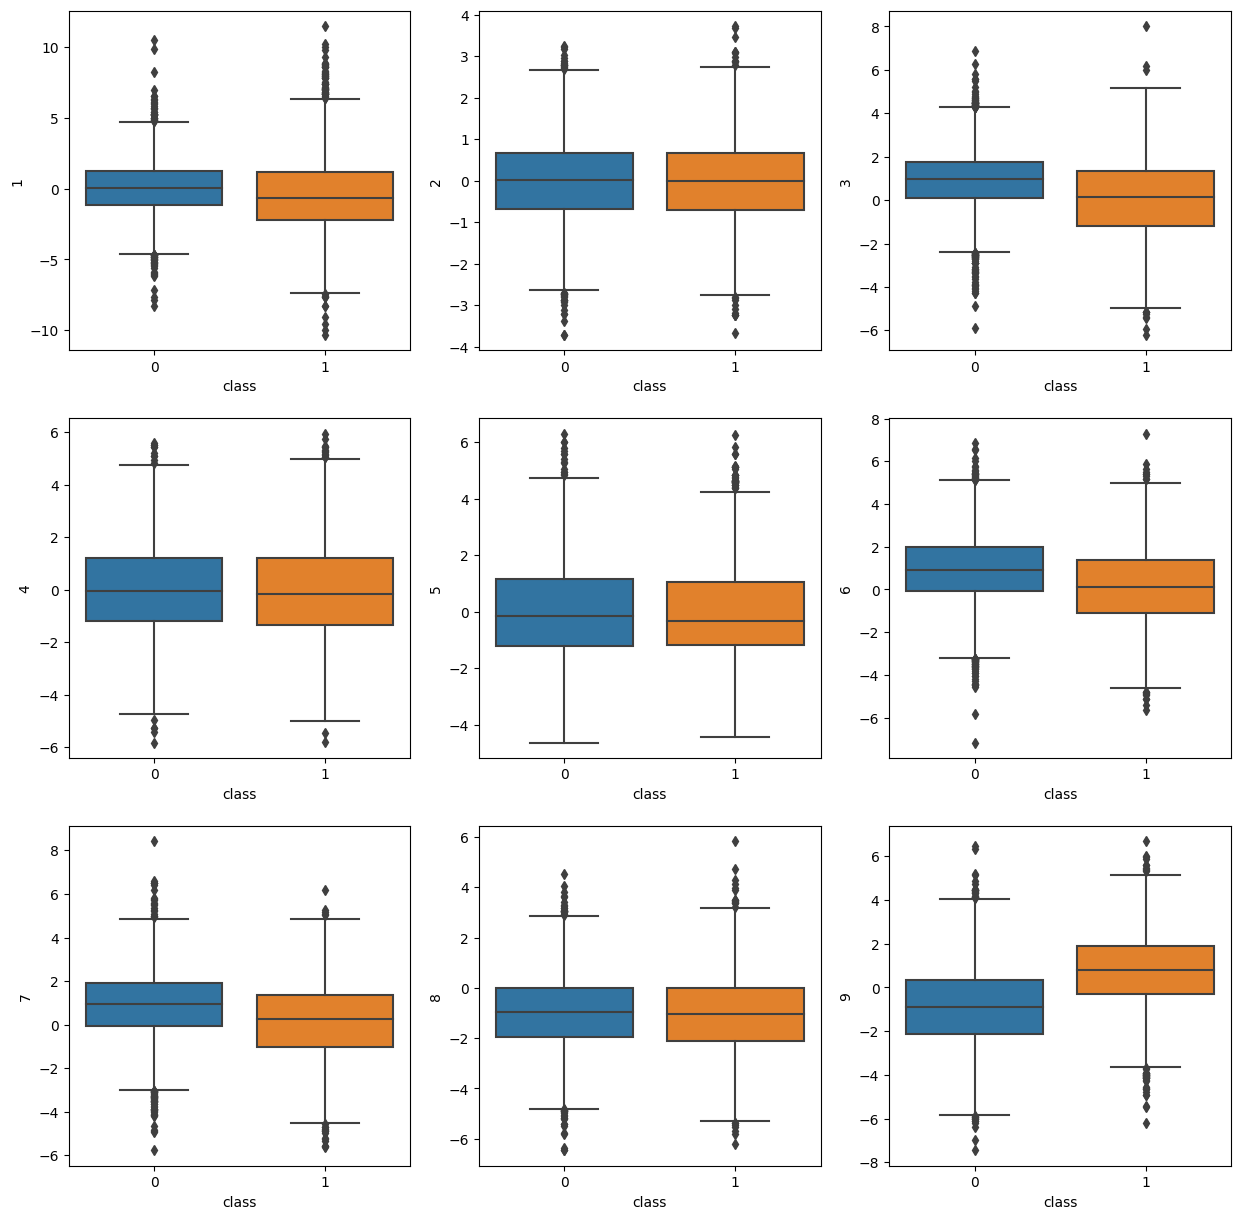

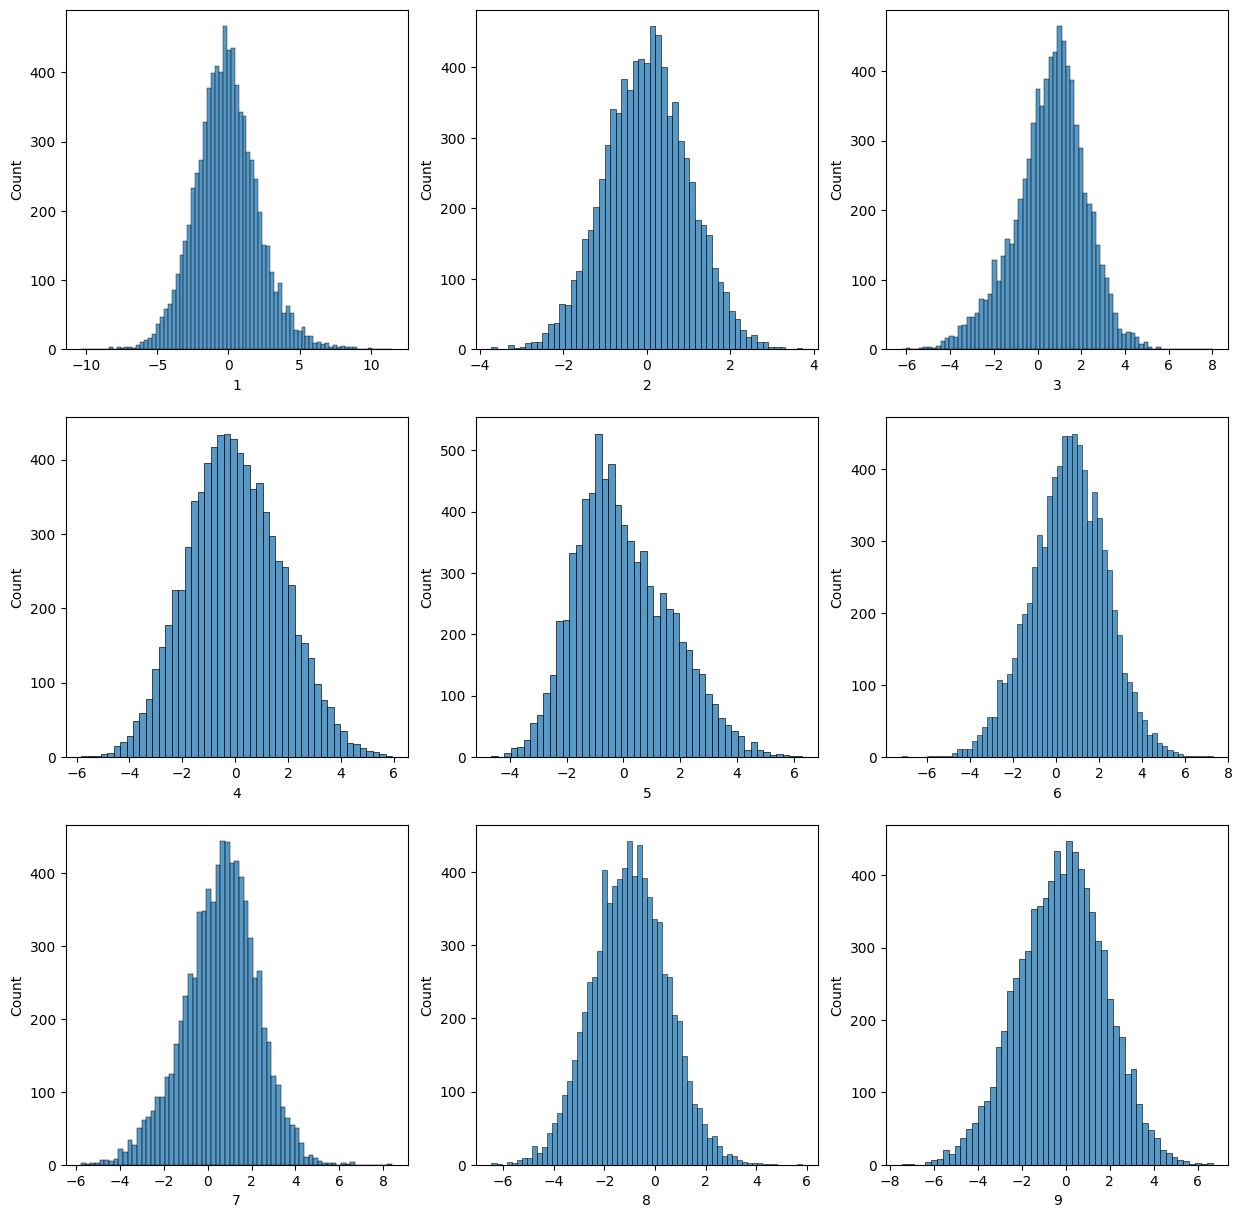

In [979]:
# make box plots for each of the features and put them in a grid of subplots
fig, axes = plt.subplots(3, 3, figsize=(15, 15))
for i, col in enumerate(train.columns[1:10]):
    sns.boxplot(x='class', y=col, data=train, ax=axes[i//3, i%3])

# make histograms for each of the features and put them in a grid of subplots
fig, axes = plt.subplots(3, 3, figsize=(15, 15))
for i, col in enumerate(train.columns[1:10]):
    sns.histplot(x=col, data=train, ax=axes[i//3, i%3])

<AxesSubplot: >

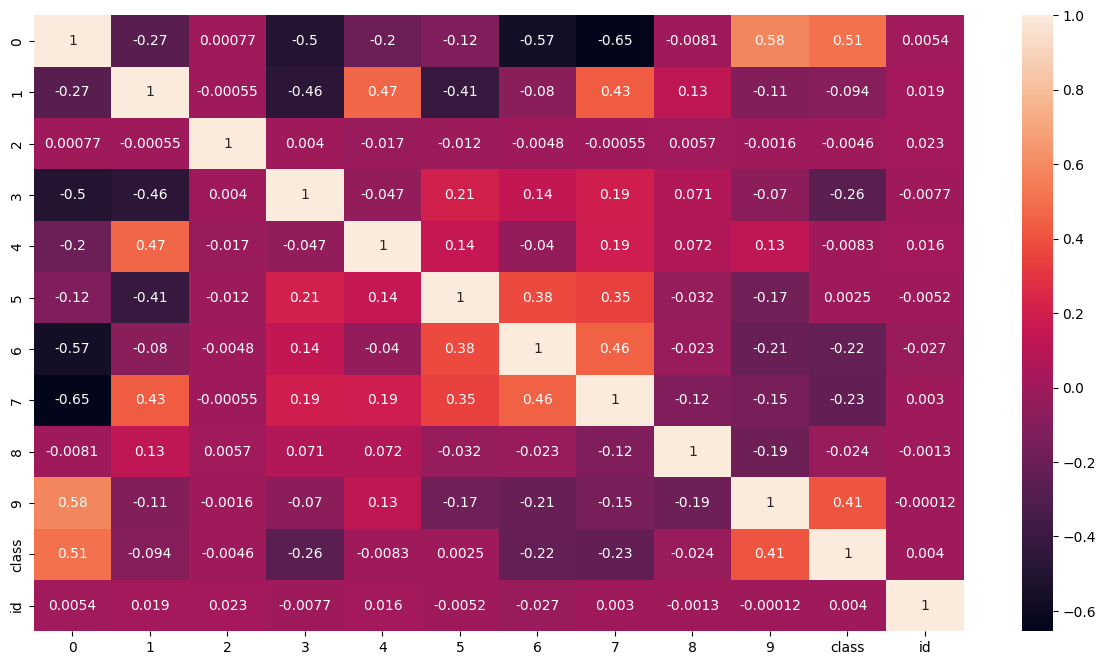

In [980]:
# make a correlation matrix but make the display bigger

plt.figure(figsize=(15, 8))
sns.heatmap(train.corr(), annot=True)

In [981]:
def conf_matrix(actual, predicted):
    confusion_matrix = metrics.confusion_matrix(actual, predicted)
    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

    cm_display.plot()
    plt.show()

In [982]:
# normalize the data 
def normalize(df):
    df = (df - df.mean()) / df.std()
    return df

# split the data into X and y
X = train.drop('class', axis=1)
y = train['class']

# split the test data into X_test
X_test = test

# normalize the data
#X = normalize(X)
#X_test = normalize(X_test)

# split the data into training and validation sets
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
X.head(30)


,0,1,2,3,4,5,6,7,8,9,id
0,3.179786,-1.323101,0.083145,0.609515,-0.613053,0.108101,-3.291309,-0.452742,-1.398187,1.550124,0
1,-3.561601,-2.556290,-0.179052,0.480700,0.361156,4.257959,3.799368,1.319575,-1.001560,-2.972358,1
2,-5.764155,1.480941,0.862413,1.263286,3.212107,2.676605,3.099489,4.239148,-2.612766,0.325536,2
3,-1.453102,-1.700500,-0.726587,0.523653,-1.873056,0.839836,3.113752,0.713735,0.324876,-0.194352,3
4,-4.225023,2.566247,-0.198841,0.086999,3.232867,0.223627,1.424584,1.700283,-1.411837,-0.589188,4
5,-10.358683,2.771434,-0.470373,3.448336,1.509444,-2.663263,0.658369,2.188560,-2.633795,-3.562926,5
6,-1.899557,-0.317246,1.047478,1.442945,0.622913,-0.241569,-1.100874,-0.132412,-0.853562,-1.163550,6
7,-1.530366,-1.785210,1.151346,1.443028,0.595023,3.963107,3.578809,2.977498,0.618910,1.695241,7
8,4.996665,-4.305831,-0.213334,0.136339,-1.758761,-0.094217,-1.818664,-2.697623,-2.556705,2.395371,8
9,3.278537,-2.196611,-1.533930,-0.928444,-1.317862,-1.090588,-1.065698,-2.718589,-1.801866,0.665674,9


## Model: KNN

ACCURACY: 0.838125


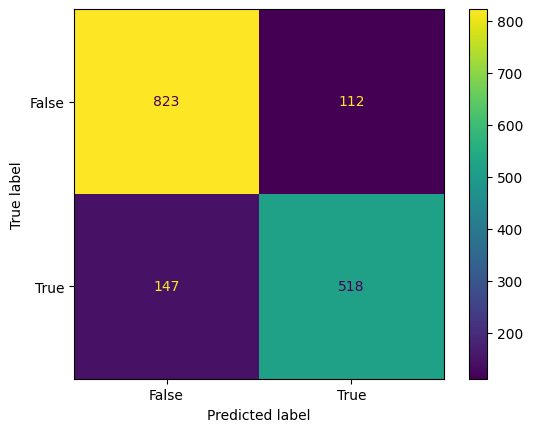

In [983]:
# using the model KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# create the model
# use a value of k = 9
X_train.drop('id', axis=1, inplace=True)
X_val.drop('id', axis=1, inplace=True)

def KNN(k):
    knn = KNeighborsClassifier(n_neighbors=9)

    knn.fit(X_train, y_train)

    # make predictions
    y_pred = knn.predict(X_val)

    # check the accuracy
    print("ACCURACY: "+str(accuracy_score(y_val, y_pred)))
    return y_pred

knn_y_pred = KNN(9)

conf_matrix(y_val, knn_y_pred)


In [984]:
#function given a model and given x and y values, it will return y_pred
def submit_model(x, y, x_test, model):
    model.fit(x, y)
    y_pred = model.predict(x_test)
    return y_pred


In [985]:
# combine x_val and X_train and fit the  model on that
X_train_val = pd.concat([X_train, X_val])
y_train_val = pd.concat([y_train, y_val])

# make predictions on the test data
X_test.drop('id', axis=1, inplace=True)
knn_y_pred = submit_model(X_train_val, y_train_val, X_test, KNeighborsClassifier(n_neighbors=9))


In [986]:
# naive bayes
from sklearn.naive_bayes import GaussianNB

# create the model
def naive_bayes(X_train, y_train, X_val, y_val):
    gnb = GaussianNB()

    # fit the model
    gnb.fit(X_train, y_train)

    # make predictions
    y_pred = gnb.predict(X_val)

    # check the accuracy
    print("ACCURACY: "+str(accuracy_score(y_val, y_pred)))

    return y_pred

ACCURACY: 0.76875


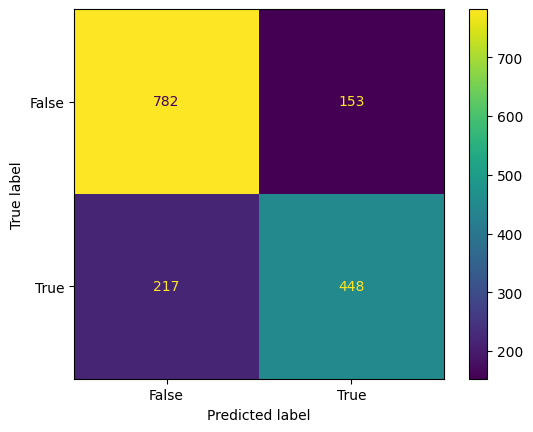

In [987]:
# run the model
gnb_y_pred = naive_bayes(X_train, y_train, X_val, y_val)

conf_matrix(y_val, gnb_y_pred)


In [988]:
#  combine x_val and X_train and fit the  model on that

X_train_complete = pd.concat([X_train, X_val])
y_train_complete = pd.concat([y_train, y_val])

# make predictions on the test data
gnb_y_pred = submit_model(X_train_complete, y_train_complete, X_test, GaussianNB())

In [989]:
# xgboost
from xgboost import XGBClassifier

    # create the model
def xgboost(X_train, X_val, y_train, y_val):
    xgb = XGBClassifier()

    # fit the model
    xgb.fit(X_train, y_train)

    # make predictions
    y_pred = xgb.predict(X_val)

    # check the accuracy
    print("ACCURACY: "+str(accuracy_score(y_val, y_pred)))

    return y_pred


ACCURACY: 0.834375


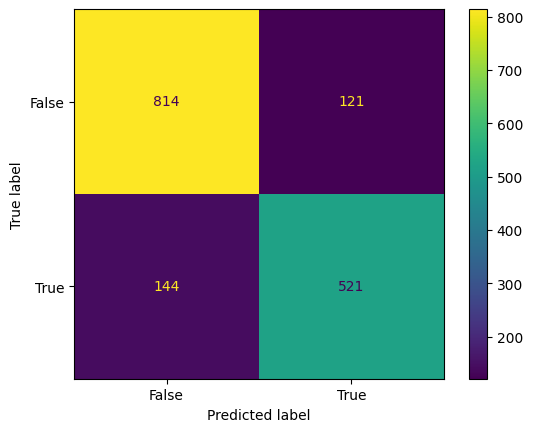

In [990]:
# run the model
xgb_y_pred = xgboost(X_train, X_val, y_train, y_val)

conf_matrix(y_val, xgb_y_pred)


In [991]:
# create the model
def svm1(X_train, X_val, y_train, y_val):
    svm1 = svm.SVC()

    # fit the model
    svm1.fit(X_train, y_train)

    # make predictions
    y_pred = svm1.predict(X_val)

    # check the accuracy
    print("ACCURACY: "+str(accuracy_score(y_val, y_pred)))

    return y_pred

ACCURACY: 0.839375


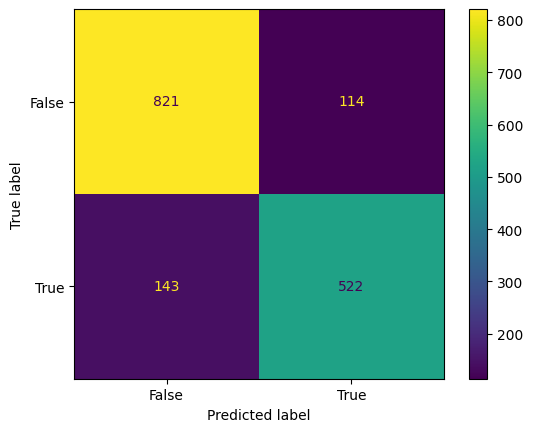

In [992]:
svm_y_pred = svm1(X_train, X_val, y_train, y_val)

conf_matrix(y_val, svm_y_pred)

ACCURACY: 0.785625


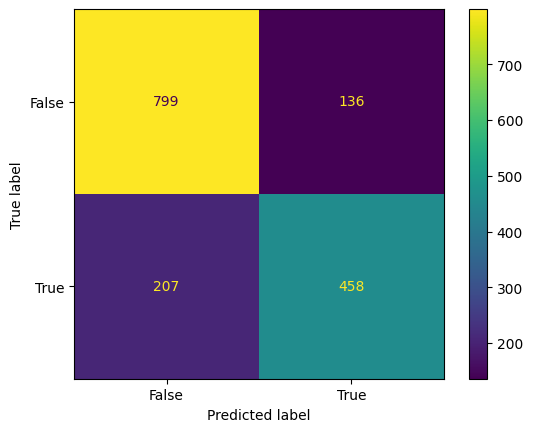

In [993]:
# using the model KNN
from sklearn.linear_model import LogisticRegressionCV

def lr(X_train, X_val, y_train, y_val):
    lr = LogisticRegressionCV()

    lr.fit(X_train, y_train)

    # make predictions
    y_pred = lr.predict(X_val)

    # check the accuracy
    print("ACCURACY: "+str(accuracy_score(y_val, y_pred)))
    return y_pred

lr_y_pred = lr(X_train, X_val, y_train, y_val)
conf_matrix(y_val, lr_y_pred)

ACCURACY: 0.85625


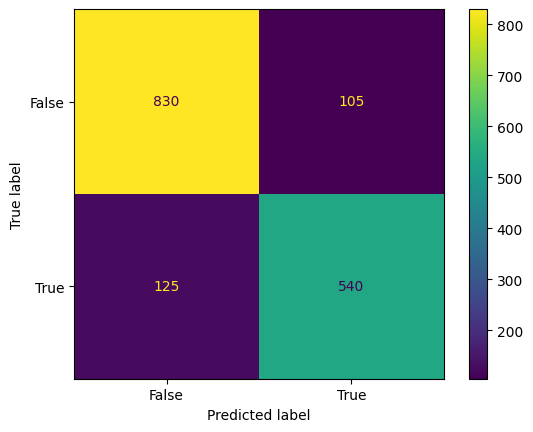

In [994]:

from matplotlib.widgets import LassoSelector
from sklearn.linear_model import Lasso, LogisticRegression, RidgeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier



def ensemble_best(X_train, X_val, y_train):
    estimators = [
        ('svm', svm.SVC()),
        ('xgboost', make_pipeline(StandardScaler(), XGBClassifier())),
        ('nn', make_pipeline(StandardScaler(), MLPClassifier())),
        ('xgboost1', make_pipeline(StandardScaler(), XGBClassifier())),
        ('knn1', make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=10))),
        ('nn1', make_pipeline(StandardScaler(), MLPClassifier())),
        ('knn', make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=9))),
        ('ridge', make_pipeline(StandardScaler(), RidgeClassifier())),
        ('xgboost2', make_pipeline(StandardScaler(), XGBClassifier())),
        ('nn2', make_pipeline(StandardScaler(), MLPClassifier()))
    ]
    clf = StackingClassifier(
        estimators=estimators, final_estimator=LogisticRegression()
    )
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_val)
    # check the accuracy
    #print("ACCURACY: "+str(accuracy_score(y_val, y_pred)))
    return y_pred


#ensemble_r = ensemble_best(X_train, X_val, y_train, y_val)
#conf_matrix(y_val, ensemble_r)

In [ ]:
def ensemble_second(X_train, X_val, y_train):
    estimators = [
        ('svm', svm.SVC()),
        ('xgboost', make_pipeline(StandardScaler(), XGBClassifier())),
        ('nn', make_pipeline(StandardScaler(), MLPClassifier())),
        ('knn', make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=9))),
        ('ridge', make_pipeline(StandardScaler(), RidgeClassifier()))
    ]
    clf = StackingClassifier(
        estimators=estimators, final_estimator=LogisticRegression()
    )
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_val)
    # check the accuracy
    #print("ACCURACY: "+str(accuracy_score(y_val, y_pred)))
    return y_pred


#ensemble_r = ensemble_second(X_train, X_val, y_train, y_val)
#conf_matrix(y_val, ensemble_r)

In [995]:
# combine x_val and X_train and fit the  model on that
X_train_complete = pd.concat([X_train, X_val])
y_train_complete = pd.concat([y_train, y_val])

TypeError: ensemble() missing 1 required positional argument: 'y_val'

In [ ]:
# export the predictions to a csv file with 
# the id and the predicted class
# the file should have two columns: id and class
# the first row should be the column names
# the first column should be named id, and the second column should be named class

ensemble_test_pred = ensemble_best(X_train_complete, X_test, y_train_complete)
prediction_id = [i for i in range(0, len(ensemble_test_pred))]
prediction = pd.DataFrame({'id': prediction_id, 'class': ensemble_test_pred})
prediction.to_csv('data/byu-data-science-capstone-classification/submission.csv', index=False)